In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
# Drop the missing values
data = data.dropna()

In [5]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

In [7]:

class LinearRegression:
  def __init__(self):
    self.parameters = {}

  def forward_propagation(self, train_input):
    m = self.parameters['m']
    c = self.parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

  def cost_function(self, predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2)
    return cost

  def backward_propagation(self, train_input, train_output, predictions):
    derivatives = {}
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

  def update_parameters(self, derivatives, learning_rate):
    self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
    self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

  def train(self, train_input, train_output, learning_rate, iters):
    #initialize random parameters
    self.parameters['m'] = np.random.uniform(0,1) * -1
    self.parameters['c'] = np.random.uniform(0,1) * -1

    #initialize loss
    self.loss = []

    #iterate
    for i in range(iters):
        #forward propagation
        predictions = self.forward_propagation(train_input)

        #cost function
        cost = self.cost_function(predictions, train_output)

        #append loss and print
        self.loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #back propagation
        derivatives = self.backward_propagation(train_input, train_output, predictions)

        #update parameters
        self.update_parameters(derivatives, learning_rate)

    return self.parameters, self.loss




In [8]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


Iteration = 1, Loss = 11538.790475065447
Iteration = 2, Loss = 5239.436688605219
Iteration = 3, Loss = 2381.412898152601
Iteration = 4, Loss = 1084.7243386475723
Iteration = 5, Loss = 496.415302822723
Iteration = 6, Loss = 229.49884152193175
Iteration = 7, Loss = 108.39854727037296
Iteration = 8, Loss = 53.45520952105278
Iteration = 9, Loss = 28.52735621497552
Iteration = 10, Loss = 17.21756144719079
Iteration = 11, Loss = 12.086294922157977
Iteration = 12, Loss = 9.75823350445985
Iteration = 13, Loss = 8.701989348910564
Iteration = 14, Loss = 8.222770093921094
Iteration = 15, Loss = 8.005347675457777
Iteration = 16, Loss = 7.9067027717089715
Iteration = 17, Loss = 7.8619473579546355
Iteration = 18, Loss = 7.841641665506635
Iteration = 19, Loss = 7.83242883870246
Iteration = 20, Loss = 7.828248857333434


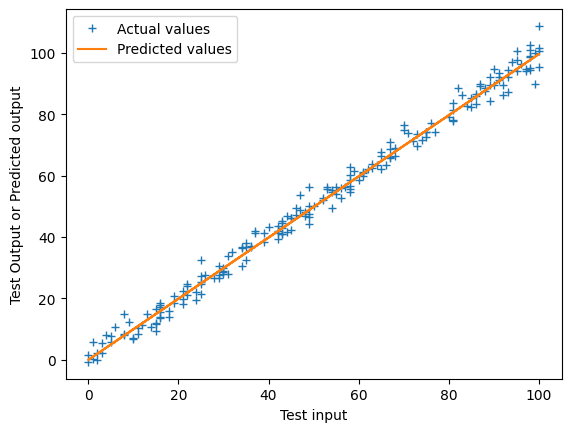

In [9]:
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']

# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()
